In [1]:

import time
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imutils
import matplotlib.image as mpimg
from collections import OrderedDict
import pandas as pd

from skimage import io, transform
from math import *
import xml.etree.ElementTree as ET 
import pandas as pd
from skimage.transform import AffineTransform, warp
from skimage.transform import rotate as rotate_transform
from skimage.util import random_noise
from skimage.filters import gaussian
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pickle


ModuleNotFoundError: No module named 'cv2'

In [54]:
model = models.resnet18()
#list(h.parameters())
count = 0

pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

11689512


In [46]:
h = models.resnet50()
list(h.parameters())
count = 0

for p in h.parameters():
    for i in p:
        if len(p)>1:
            print('ikojsfsd')
        elif len(p) <= 1:
            count+=1

print('no.param',count)

ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
ikojsfsd
i

In [10]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

'''
You instantiate it with the same arguments used for the normalize. and then use it the same way

unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
unorm(tensor)

'''

'\nYou instantiate it with the same arguments used for the normalize. and then use it the same way\n\nunorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))\nunorm(tensor)\n\n'

In [11]:
class resnet50(nn.Module):
    def __init__(self,num_classes=22):
        super().__init__()
        self.model_name='resnet50'
        self.model=models.resnet50(pretrained=True)
        self.model.conv1=nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.fc=nn.Linear(self.model.fc.in_features, num_classes)
        
    def forward(self, x):
        x=self.model(x)
        return x

        
network = resnet50()
network.load_state_dict(torch.load('C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/regressors/models/model_resnet50_regressor_finetune___.pth'))
network.cuda()
network.eval()

resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [4]:
import pandas as pd
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/classification/results_classification.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "F:/tsetse wings/V20rename/V20/"
V21 = "F:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, sep = ';', index_col=0)

csv.iloc[0,0]#[:2]

int(str(csv.iloc[400,0])[-5:-2].lstrip('0'))


21

In [5]:



import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/classification/results_classification.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "F:/tsetse wings/V20rename/V20/"
V21 = "F:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, sep = ';', index_col=0)



random_samples = random.sample(range(0,len(csv)), 120 )
counter = 0
start_time = time.time()

i = 0
pages =  [1 , 11 , 14 , 27 , 29 , 30 , 34 , 35 , 36 , 39 , 42 , 48 , 53 , 64 , 66 , 68 , 73 , 75 ,118 ,139 ,142 ,153 ,159 ,174, 187, 196, 201, 208, 209, 210, 211 ,212 ,218, 219, 224, 225, 226, 228, 232, 246, 274 ,283, 291, 310 ,321, 322, 324, 333, 334 ,336, 337, 338, 339, 351, 357, 358, 383, 389, 390, 391,399, 406, 411, 417, 428, 447, 458, 561, 651, 677, 705, 712, 731, 738, 757,764, 768, 778,11 , 27,  34,  35,  36,  39,  42 , 48 , 64,  66,  73,  75, 118, 153, 159, 187, 196, 201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 283,310, 321, 322, 333, 336, 338, 357, 358, 383, 389, 391, 399, 406, 411, 417, 428, 712, 764, 768,778,11,  27,  34,  35,  36,  39,  42,  48,  64,  75, 118, 159, 187, 196, 201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 310, 321, 322, 333, 336, 357, 358, 389, 391, 406, 411, 428, 764, 768, 778, 11,  27,  34,  35,  36,  39,  42,  48,  64,  75,159, 187, 196 ,201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 321, 322, 336, 357, 358, 389, 406, 428, 764, 768, 778]

pages = [336, 357, 358, 389, 406, 428, 764, 768, 778]
for row in range(len(csv)): #len(csv))
    if  int(str(csv.iloc[row,0])[-5:-2].lstrip('0')) in pages:
        print(int(str(csv.iloc[0,0])[-5:-2].lstrip('0')))
        new_dir = 'F:/results/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')))
        if not os.path.exists(new_dir):
            os.mkdir('F:/results/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0'))))

            #   V20

        if int(str(csv.iloc[row,0])[:2]) == 20: 
            if (('V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )))):
            #filename_ = 'V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])
            #if filename_ in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )):
                
                im_L_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}L.bmp'.format                   (str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
                
                im_R_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R_.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                        
                    plt.close()


                
            else:
                print('none')


        elif int(str(csv.iloc[row,0])[:2]) == 21:
            if ('V21P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))):

                im_L_ = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}L.bmp'.format(str                   (csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))


                    plt.close()


                    

                im_R = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
            else:
                print('none')   


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:



import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/classification/results_classification.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "F:/tsetse wings/V20rename/V20/"
V21 = "F:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, sep = ';', index_col=0)



random_samples = random.sample(range(0,len(csv)), 120 )
counter = 0
start_time = time.time()

i = 0
pages =  [1 , 11 , 14 , 27 , 29 , 30 , 34 , 35 , 36 , 39 , 42 , 48 , 53 , 64 , 66 , 68 , 73 , 75 ,118 ,139 ,142 ,153 ,159 ,174, 187, 196, 201, 208, 209, 210, 211 ,212 ,218, 219, 224, 225, 226, 228, 232, 246, 274 ,283, 291, 310 ,321, 322, 324, 333, 334 ,336, 337, 338, 339, 351, 357, 358, 383, 389, 390, 391,399, 406, 411, 417, 428, 447, 458, 561, 651, 677, 705, 712, 731, 738, 757,764, 768, 778,11 , 27,  34,  35,  36,  39,  42 , 48 , 64,  66,  73,  75, 118, 153, 159, 187, 196, 201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 283,310, 321, 322, 333, 336, 338, 357, 358, 383, 389, 391, 399, 406, 411, 417, 428, 712, 764, 768,778,11,  27,  34,  35,  36,  39,  42,  48,  64,  75, 118, 159, 187, 196, 201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 310, 321, 322, 333, 336, 357, 358, 389, 391, 406, 411, 428, 764, 768, 778, 11,  27,  34,  35,  36,  39,  42,  48,  64,  75,159, 187, 196 ,201, 208, 209, 210, 211, 212, 219, 224, 225, 226, 228, 232, 321, 322, 336, 357, 358, 389, 406, 428, 764, 768, 778]

pages = [336, 357, 358, 389, 406, 428, 764, 768, 778]
for row in range(len(csv)): #len(csv))
    if  int(str(csv.iloc[row,0])[-5:-2].lstrip('0')) in pages:
        print(int(str(csv.iloc[0,0])[-5:-2].lstrip('0')))
        new_dir = 'F:/results/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')))
        if not os.path.exists(new_dir):
            os.mkdir('F:/results/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0'))))

            #   V20

        if int(str(csv.iloc[row,0])[:2]) == 20: 
            if (('V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )))):
            #filename_ = 'V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])
            #if filename_ in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )):
                
                im_L_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}L.bmp'.format                   (str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
                
                im_R_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R_.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                        
                    plt.close()


                
            else:
                print('none')


        elif int(str(csv.iloc[row,0])[:2]) == 21:
            if ('V21P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))):

                im_L_ = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}L.bmp'.format(str                   (csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))


                    plt.close()


                    

                im_R = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('F:/results/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
            else:
                print('none')   


In [6]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/regression/lm_preds_cleaned_data1_inliers.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "G:/tsetse wings/V20rename/V20/"
V21 = "G:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, index_col=0)
print(csv)
print(csv.columns)

            vpn  cd        cm  cy                 md   g  s    c  wlm  f  ...  \
0      20000101   4  November  94  Odour-baited trap  Gp  2  1.0  732  3  ...   
1      20000102   4  November  94  Odour-baited trap  Gp  2  5.0  732  4  ...   
2      20000103   4  November  94  Odour-baited trap  Gp  2  5.0  723  5  ...   
3      20000104   4  November  94  Odour-baited trap  Gp  2  4.0  732  5  ...   
4      20000105   4  November  94  Odour-baited trap  Gp  2  7.0  713  3  ...   
...         ...  ..       ...  ..                ...  .. ..  ...  ... ..  ...   
14663  21077806  21      July  96  Odour-baited trap  Gp  2  0.0  771  1  ...   
14664  21077807  21      July  96  Odour-baited trap  Gp  2  2.0  752  3  ...   
14665  21077808  21      July  96  Odour-baited trap  Gp  2  2.0  752  2  ...   
14666  21077809  21      July  96  Odour-baited trap  Gp  2  1.0  761  2  ...   
14667  21077810  22      July  96  Odour-baited trap  Gp  2  1.0  771  1  ...   

             r_y8         r

In [14]:
#filtering inliers and outliers




import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/regression/lm_preds_cleaned_data1_inliers.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "G:/tsetse wings/V20rename/V20/"
V21 = "G:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, index_col=0)
print(csv.columns)



random_samples = random.sample(range(0,len(csv)), 120 )
counter = 0
start_time = time.time()

i = 0
for row in range(len(csv)): #len(csv))
    if  csv.iloc[row,-1] == 0 and csv.iloc[row,13] == '0' and csv.iloc[row,14] == '0':#int(str(csv.iloc[row,0])[-5:-2].lstrip('0')) in pages:
        print(int(str(csv.iloc[0,0])[-5:-2].lstrip('0')))
        new_dir = 'G:/results2/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')))
        if not os.path.exists(new_dir):
            os.mkdir('G:/results2/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0'))))

            #   V20

        if int(str(csv.iloc[row,0])[:2]) == 20: 
            if (('V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )))):
            #filename_ = 'V20P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])
            #if filename_ in os.listdir(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') )):
                
                im_L_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}L.bmp'.format                   (str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('G:/results2/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
                
                im_R_ = Image.open(V20 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V20P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R_.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('G:/results2/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V20P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                        
                    plt.close()


                
            else:
                print('none')


        elif int(str(csv.iloc[row,0])[:2]) == 21:
            if ('V21P{}L{}L.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))) and ('V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]) in os.listdir(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ))):

                im_L_ = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}L.bmp'.format(str                   (csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))

                with torch.no_grad():
                    im_L = TF.resize(im_L_, (224,224))
                    im_L = TF.to_tensor(im_L).cuda()
                    im_L = TF.normalize(im_L, [0.5], [0.5])
                    im_L = torch.reshape(im_L, (1, 3, 224, 224))
                    predictionL = (network(im_L) + 0.5)
                    predictionL = predictionL.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionL = predictionL.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_L_)
                    plt.scatter(predictionL[0][:,0], predictionL[0][:,1], s=10, color ='r')
                    plt.savefig('G:/results2/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}L.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))


                    plt.close()


                    

                im_R = Image.open(V21 + 'page{}/Picture/'.format( str(csv.iloc[row,0])[-5:-2].lstrip('0') ) + 'V21P{}L{}R.bmp'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:]))
                im_R_ = im_R.transpose(method=Image.FLIP_LEFT_RIGHT) 


                with torch.no_grad():
                    im_R = TF.resize(im_R_, (224,224))
                    im_R = TF.to_tensor(im_R).cuda()
                    im_R = TF.normalize(im_R, [0.5], [0.5])
                    im_R = torch.reshape(im_R, (1, 3, 224, 224))
                    predictionR = (network(im_R) + 0.5)
                    predictionR = predictionR.view(-1,11,2)*torch.tensor([1280, 1024]).cuda()
                    predictionR = predictionR.cpu()
                    #print(predictionL[0][:,0])
                    plt.figure(figsize=(10,10))
                    plt.imshow(im_R_)
                    plt.scatter(predictionR[0][:,0], predictionR[0][:,1], s=10, color ='r')
                    plt.savefig('G:/results2/{}/{}'.format( int(str(csv.iloc[row,0])[-5:-2].lstrip('0')), 'V21P{}L{}R.png'.format(str(csv.iloc[row,0])[-5:-2],str(csv.iloc[row,0])[-2:])))
                    plt.close()
            else:
                print('none')   



Index(['vpn', 'cd', 'cm', 'cy', 'md', 'g', 's', 'c', 'wlm', 'f', 'lmkl',
       'lmkr', 'hc', 'left_bad_pred', 'right_bad_pred', 'left_bad_true',
       'right_bad_pred.1', 'l_x1', 'l_y1', 'l_x2', 'l_y2', 'l_x3', 'l_y3',
       'l_x4', 'l_y4', 'l_x5', 'l_y5', 'l_x6', 'l_y6', 'l_x7', 'l_y7', 'l_x8',
       'l_y8', 'l_x9', 'l_y9', 'l_x10', 'l_y10', 'l_x11', 'l_y11', 'r_x1',
       'r_y1', 'r_x2', 'r_y2', 'r_x3', 'r_y3', 'r_x4', 'r_y4', 'r_x5', 'r_y5',
       'r_x6', 'r_y6', 'r_x7', 'r_y7', 'r_x8', 'r_y8', 'r_x9', 'r_y9', 'r_x10',
       'r_y10', 'r_x11', 'r_y11', 'dis_l', 'dis_r', 'inliers'],
      dtype='object')
1
1
1
1
1
1
1
1
1
1
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
none
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
none
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
none
1
none
1
none
1
non

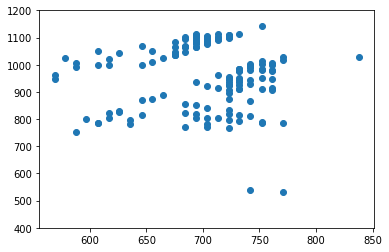

In [20]:
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/regression/lm_preds_cleaned_data1_inliers.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "G:/tsetse wings/V20rename/V20/"
V21 = "G:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, index_col=0)
print


csv_ = csv[csv.iloc[:,-1] == 0]
csv_ = csv_[csv_.iloc[:,13] == '0']
csv_ = csv_[csv_.iloc[:,14] == '0']

plt.scatter(csv_.iloc[:,8], csv_.iloc[:,-2])
plt.ylim((400,1200))
plt.title('outliers vs inliers')
plt.show()

In [23]:
len(csv_ )

194

In [22]:
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/regression/lm_preds_cleaned_data1_inliers.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "G:/tsetse wings/V20rename/V20/"
V21 = "G:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, index_col=0)
print(len(csv))

14668


In [24]:
csv_dir = 'C:/Users/dylan/Work-Projects/msc_haar/manuscript1_exp/Pipeline/regression/lm_preds_cleaned_data1_inliers.csv'
#csv_dir = "D:/Tsetse fly Project/Data/Vols2021DataforMorphometricsOct2020.csv"
V20 = "G:/tsetse wings/V20rename/V20/"
V21 = "G:/tsetse wings/V21rename/"
#csv = pd.read_csv(csv_dir, sep=';')
csv = pd.read_csv(csv_dir, index_col=0)
print


csv_ = csv[csv.iloc[:,-1] == 1]
csv_ = csv_[csv_.iloc[:,13] == '0']
csv_ = csv_[csv_.iloc[:,14] == '0']

In [25]:
len(csv_)

12304

In [28]:
csv_.columns

Index(['vpn', 'cd', 'cm', 'cy', 'md', 'g', 's', 'c', 'wlm', 'f', 'lmkl',
       'lmkr', 'hc', 'left_bad_pred', 'right_bad_pred', 'left_bad_true',
       'right_bad_pred.1', 'l_x1', 'l_y1', 'l_x2', 'l_y2', 'l_x3', 'l_y3',
       'l_x4', 'l_y4', 'l_x5', 'l_y5', 'l_x6', 'l_y6', 'l_x7', 'l_y7', 'l_x8',
       'l_y8', 'l_x9', 'l_y9', 'l_x10', 'l_y10', 'l_x11', 'l_y11', 'r_x1',
       'r_y1', 'r_x2', 'r_y2', 'r_x3', 'r_y3', 'r_x4', 'r_y4', 'r_x5', 'r_y5',
       'r_x6', 'r_y6', 'r_x7', 'r_y7', 'r_x8', 'r_y8', 'r_x9', 'r_y9', 'r_x10',
       'r_y10', 'r_x11', 'r_y11', 'dis_l', 'dis_r', 'inliers'],
      dtype='object')

In [27]:
print(csv_['g'].unique())

['Gp' 'Gmm']


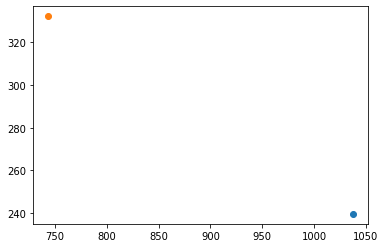

In [35]:
#plt.scatter(np.mean(csv_.iloc[:,17]),np.mean(csv_.iloc[:,18]))
#plt.scatter(np.mean(csv_.iloc[:,19]),np.mean(csv_.iloc[:,20]))
#plt.show()